In [ ]:
#opencv used
#so directly we cannot split validation set in intial stage
#it has done in end of the model (validation split)

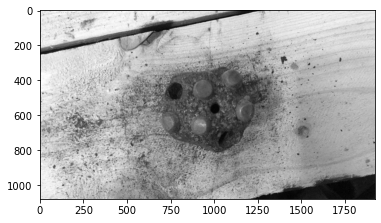

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/nx1766/Desktop/classes"

CATEGORIES = ["Failure", "Non Failure"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  # create path to failure and nonfailure
    for img in os.listdir(path):  # iterate over each image per failure and nonfailure
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

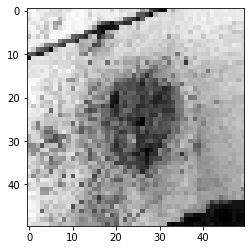

In [2]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

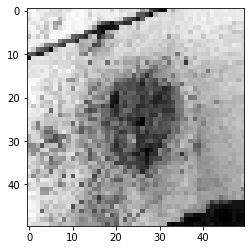

In [3]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

# data preparation

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path to failure and nonfailure
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=nonfailure 1=failure

        for img in tqdm(os.listdir(path)):  # iterate over each image per failure and nonfailure
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 771/771 [00:10<00:00, 75.68it/s]

2572


In [5]:
import random
random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
0
1
1
0
1
0
0


In [7]:
X = [] #traning images
y = [] #labels

In [8]:
for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[254]
   [254]
   [254]
   ...
   [ 66]
   [131]
   [129]]

  [[254]
   [254]
   [254]
   ...
   [ 59]
   [ 95]
   [ 54]]

  [[254]
   [254]
   [254]
   ...
   [116]
   [106]
   [ 52]]

  ...

  [[191]
   [157]
   [171]
   ...
   [189]
   [214]
   [203]]

  [[172]
   [160]
   [153]
   ...
   [213]
   [222]
   [201]]

  [[174]
   [194]
   [143]
   ...
   [218]
   [159]
   [203]]]]


In [9]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# sample model

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X=np.array(X/255.0)
y=np.array(y)

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y,validation_split=0.2, batch_size=32, epochs=3)

Epoch 1/3
65/65 [==============================] - 28s 433ms/step - loss: 0.5807 - accuracy: 0.7083 - val_loss: 0.4788 - val_accuracy: 0.7573
Epoch 2/3
65/65 [==============================] - 28s 432ms/step - loss: 0.4297 - accuracy: 0.7822 - val_loss: 0.4110 - val_accuracy: 0.7845
Epoch 3/3
65/65 [==============================] - 29s 447ms/step - loss: 0.3811 - accuracy: 0.8250 - val_loss: 0.3809 - val_accuracy: 0.8175


# Model1

In [ ]:
import pickle

pickle_in = open("/content/drive/MyDrive/picklefiles/X1.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/picklefiles/y1.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np

In [ ]:
batch_size=32
steps_per_epoch = int( np.ceil(X.shape[0] / batch_size) )


In [ ]:
X=np.array(X/255.0)
y=np.array(y)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(X, y,validation_split=0.2,validation_steps=16, batch_size=32, epochs=10,steps_per_epoch=81)

In [ ]:
model.save('/content/drive/MyDrive/picklefiles/trainedmodel/trained512.h5')


In [ ]:
print(model.summary())

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.ylabel("accuracy") 
plt.xlabel("epoch")
plt.legend()
plt.figure()

plt.show()

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()

# model2

In [ ]:
X=np.array(X/255.0)
y=np.array(y)
classifier = Sequential()
classifier.add(Conv2D(32, 3, 3, input_shape =X.shape[1:], activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Conv2D(64, 3, 3, activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (3, 3)))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units= 128, activation = 'relu'))
classifier.add(Dense( units=2, activation = 'softmax'))
# classifier.add(Dense(output_dim = 2, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history1=classifier.fit(X,y,validation_split=0.2,validation_steps=16,epochs =10,steps_per_epoch=81)

In [ ]:
classifier.save('/content/drive/MyDrive/picklefiles/trainedmodel/trained2(512).h5')


In [ ]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.ylabel("accuracy") 
plt.xlabel("epoch")
plt.legend()
plt.figure()

plt.show()

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()